In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


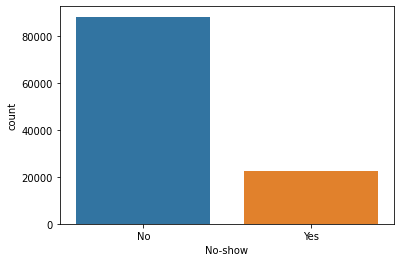

In [ ]:
import seaborn as sns
sns.countplot(df['No-show'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


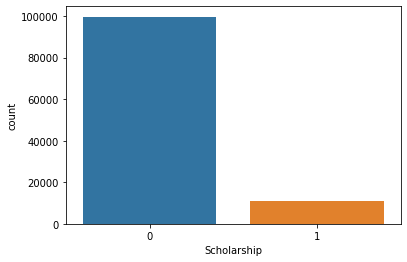

In [ ]:
sns.countplot(df['Scholarship'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


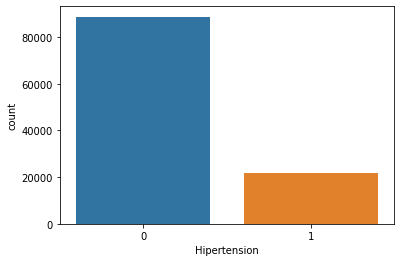

In [ ]:
sns.countplot(df['Hipertension'])

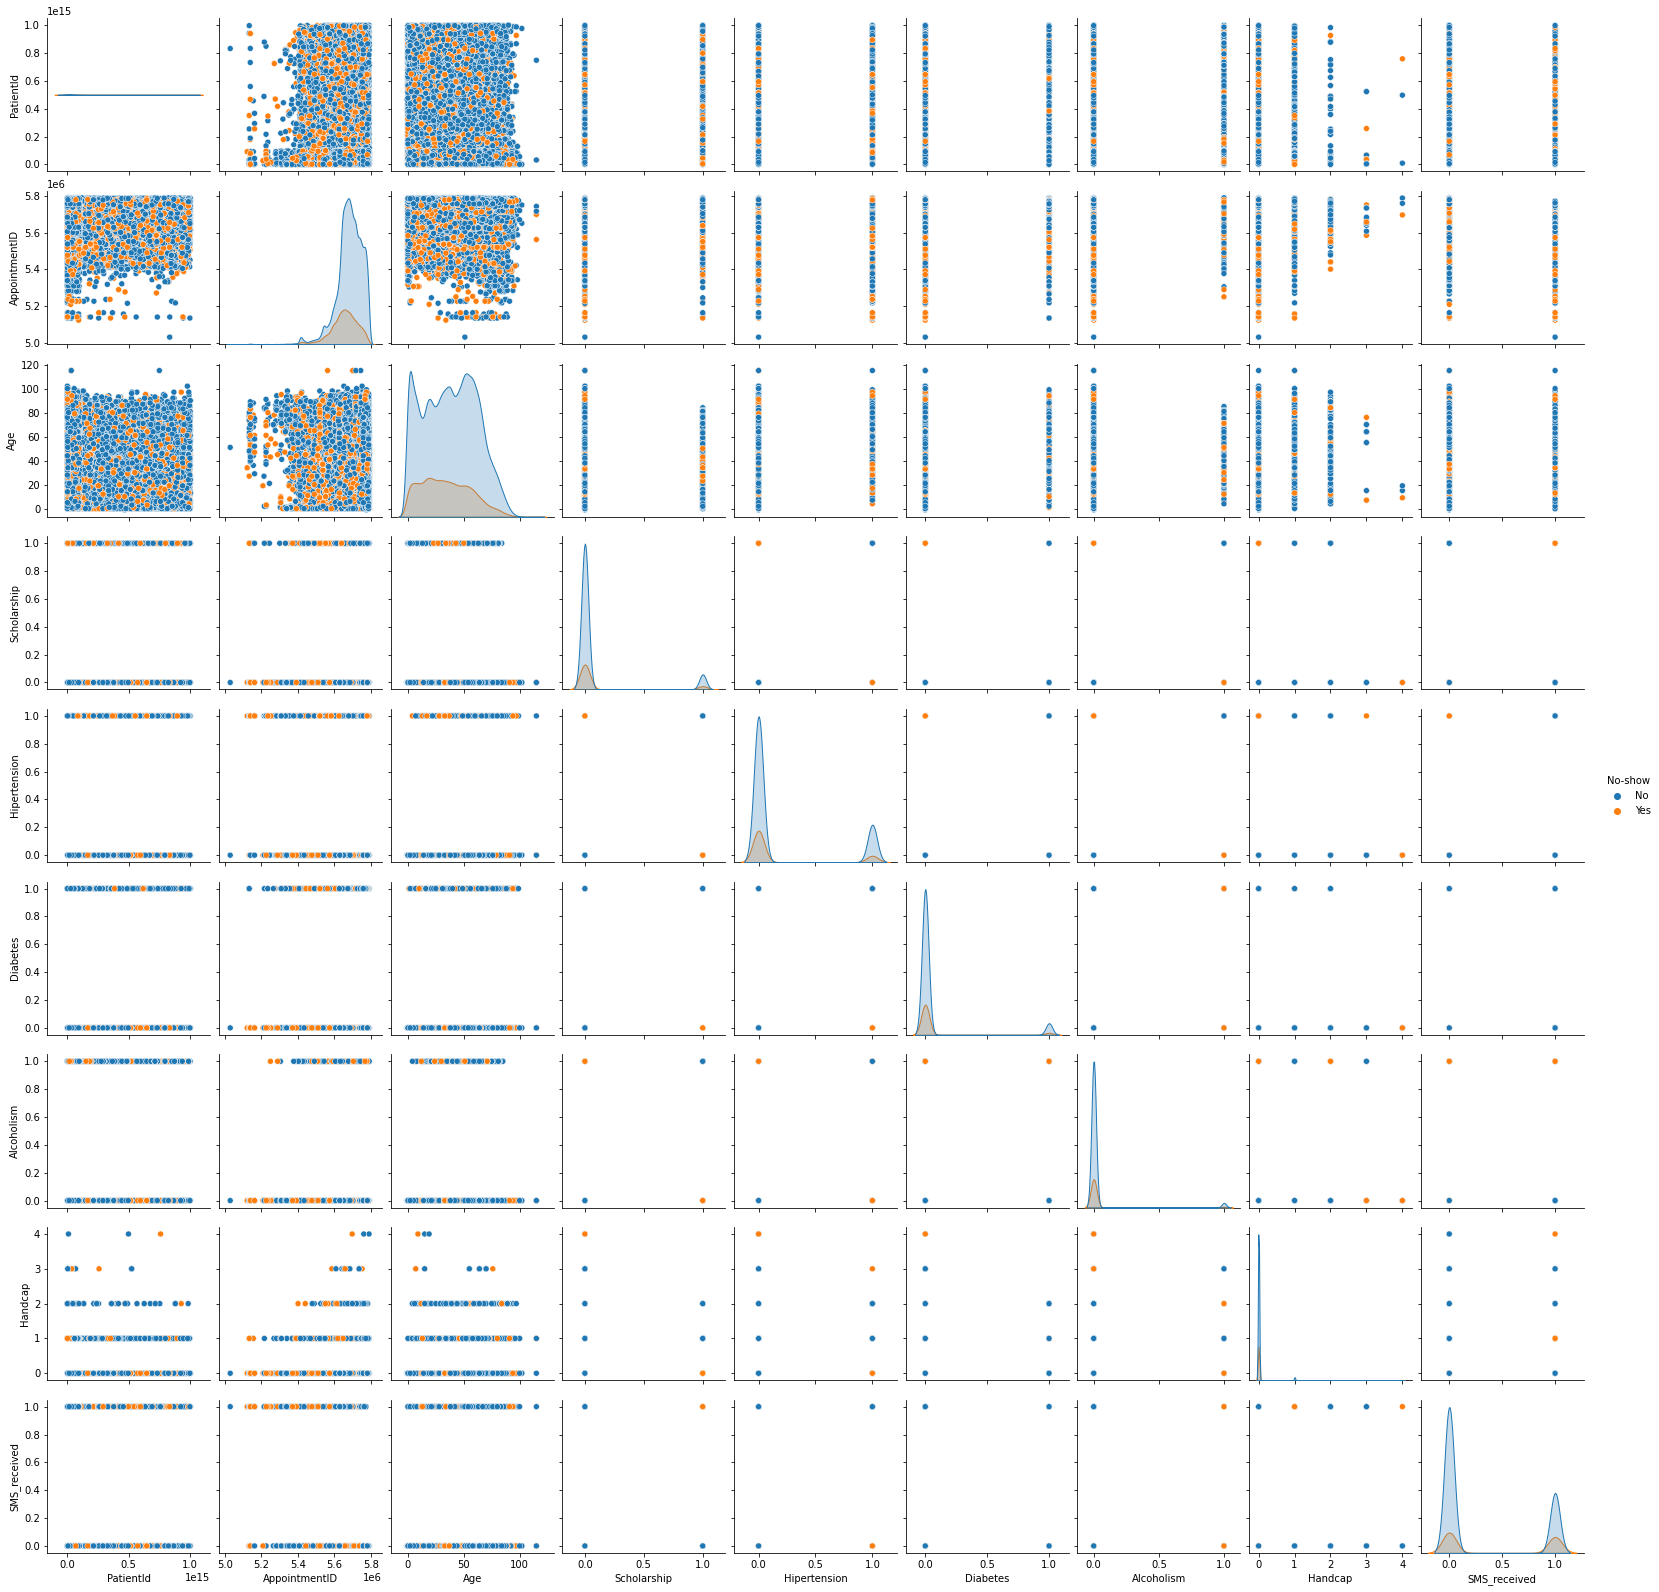

In [ ]:
sns.pairplot(df,hue = 'No-show')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


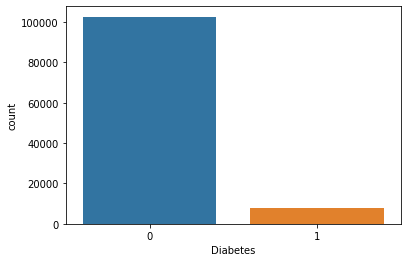

In [ ]:
sns.countplot(df['Diabetes'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


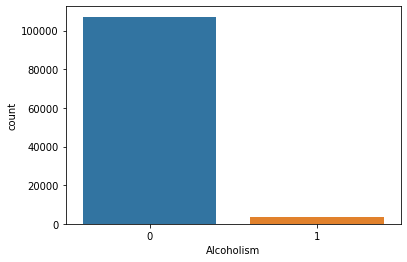

In [ ]:
sns.countplot(df['Alcoholism'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


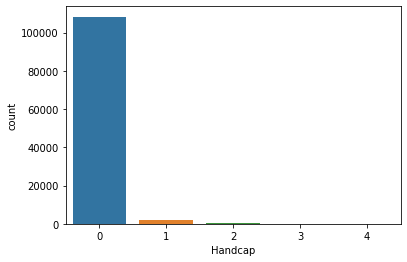

In [ ]:
sns.countplot(df['Handcap'])

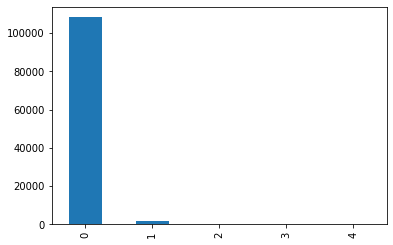

In [ ]:
df.Handcap.value_counts().plot(kind = 'bar')

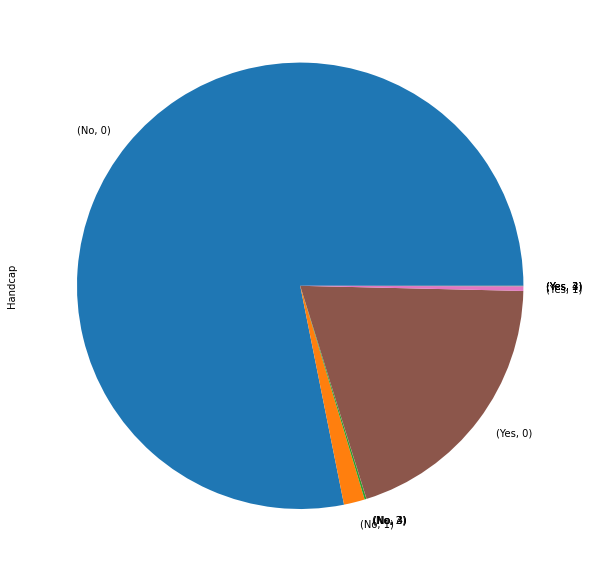

In [ ]:
df.groupby('No-show').Handcap.value_counts().plot(kind = 'pie',figsize = (10,15))

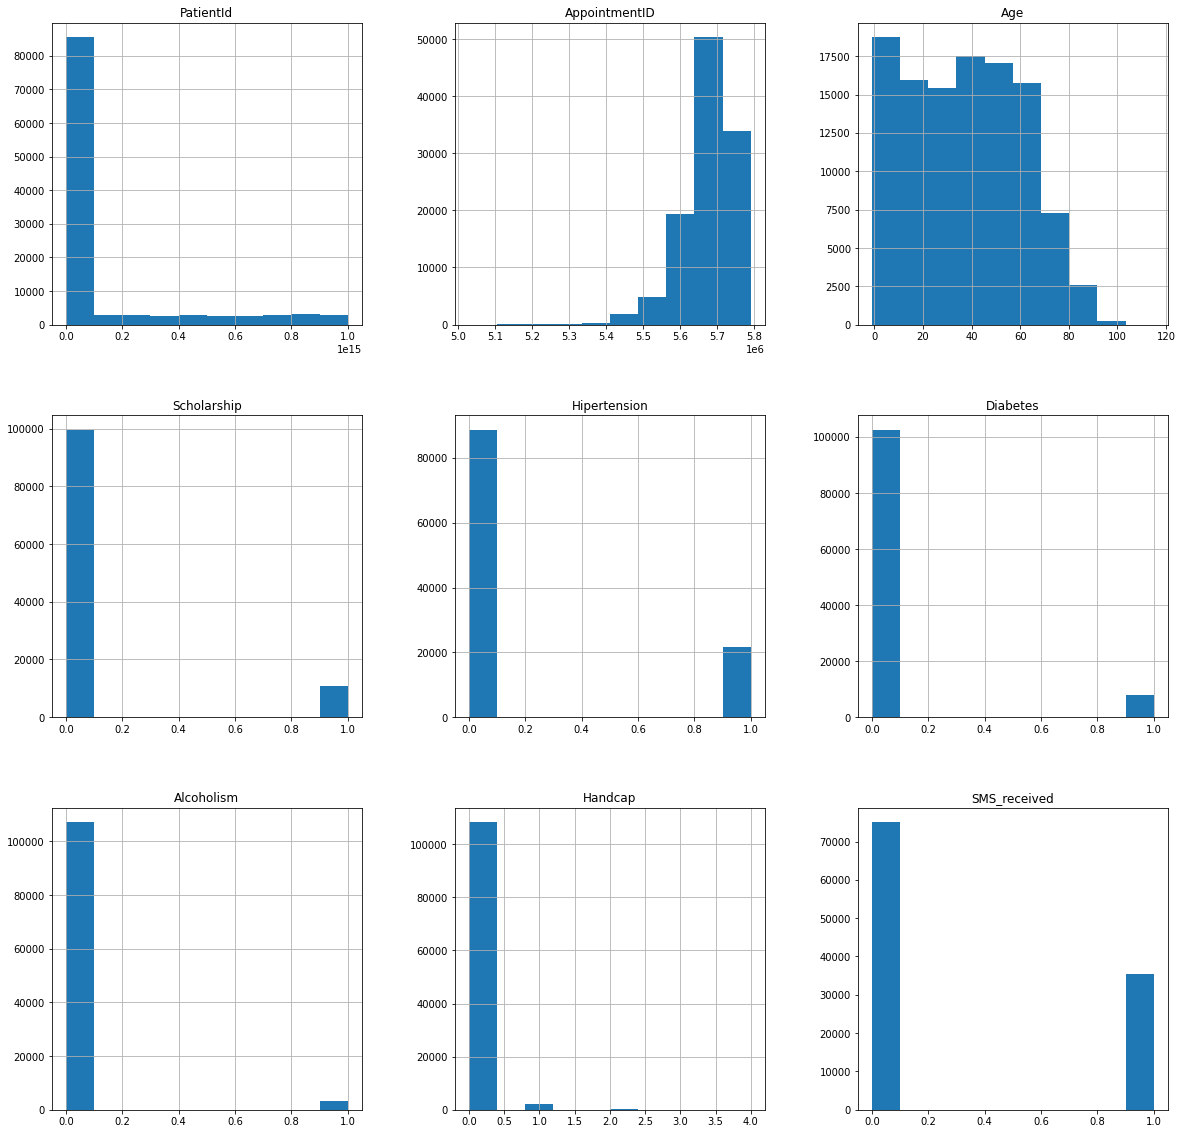

In [ ]:
df.hist(figsize=(20,20))
plt.grid()

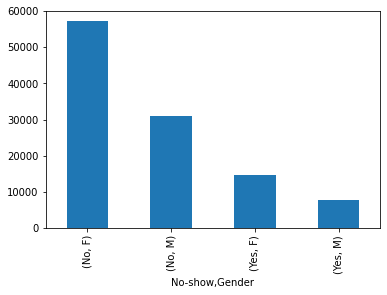

In [ ]:
df.groupby('No-show').Gender.value_counts().plot(kind = 'bar')

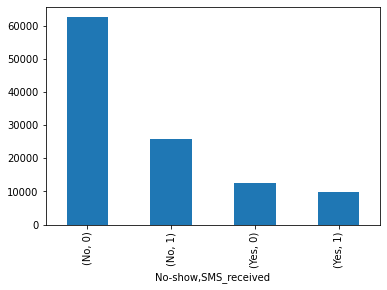

In [ ]:
df.groupby('No-show').SMS_received.value_counts().plot(kind = 'bar')

In [ ]:
df['sch_day'] = pd.to_datetime(df['ScheduledDay']).dt.day

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,sch_day
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,14.252228
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,9.345629
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,31.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
 14  sch_day         110527 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


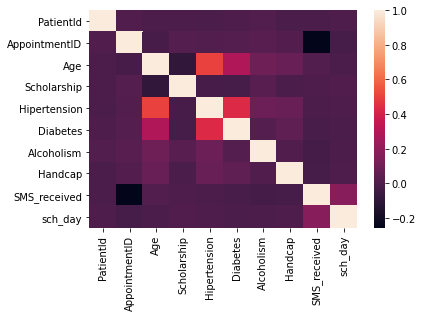

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df['apt_day'] = pd.to_datetime(df['AppointmentDay']).dt.day

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_day,apt_day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,29


In [ ]:
df2 = pd.get_dummies(df,columns = ['Gender', 'Handcap'], drop_first = True)

In [ ]:
df2.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,sch_day,apt_day,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No,29,29,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,29,29,1,0,0,0,0
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No,29,29,0,0,0,0,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No,29,29,0,0,0,0,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No,29,29,0,0,0,0,0


In [ ]:
df2 = df2.drop(columns = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Age','Neighbourhood'	], axis = 1)

In [ ]:
df2.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,sch_day,apt_day,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,0,1,0,0,0,No,29,29,0,0,0,0,0
1,0,0,0,0,0,No,29,29,1,0,0,0,0
2,0,0,0,0,0,No,29,29,0,0,0,0,0
3,0,0,0,0,0,No,29,29,0,0,0,0,0
4,0,1,1,0,0,No,29,29,0,0,0,0,0


In [ ]:
df2 = pd.get_dummies(df2, columns = ['No-show'], drop_first=True)

In [ ]:
df2.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,sch_day,apt_day,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4,No-show_Yes
0,0,1,0,0,0,29,29,0,0,0,0,0,0
1,0,0,0,0,0,29,29,1,0,0,0,0,0
2,0,0,0,0,0,29,29,0,0,0,0,0,0
3,0,0,0,0,0,29,29,0,0,0,0,0,0
4,0,1,1,0,0,29,29,0,0,0,0,0,0


In [ ]:
output = df2['No-show_Yes']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
input = [column for column in df2.columns if column != 'No-show_Yes']

In [ ]:
input

['Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'SMS_received',
 'sch_day',
 'apt_day',
 'Gender_M',
 'Handcap_1',
 'Handcap_2',
 'Handcap_3',
 'Handcap_4']

In [ ]:
x = df2.loc[:,input].values

In [ ]:
output

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show_Yes, Length: 110527, dtype: uint8

In [ ]:
 y = df2['No-show_Yes']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
print(x_train.shape,x_test.shape)

(77368, 12) (33159, 12)


In [ ]:
print(y_train.shape,y_test.shape)

(77368,) (33159,)


In [ ]:
import tensorflow as tf


In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=12))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 11)                143       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 12        
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model.fit(x_train,y_train,epochs = 100)
#score = model.evaluate(x_test,y_test,batch_size = 16)

Epoch 1/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4655 - accuracy: 0.7986
Epoch 2/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4646 - accuracy: 0.7985
Epoch 3/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4636 - accuracy: 0.7984
Epoch 4/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4632 - accuracy: 0.7985
Epoch 5/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4627 - accuracy: 0.7986
Epoch 6/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4623 - accuracy: 0.7988
Epoch 7/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4621 - accuracy: 0.7986
Epoch 8/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4612 - accuracy: 0.7985
Epoch 9/100
2418/2418 [==============================] - 3s 1ms/step - loss: 0.4610 - accuracy: 0.7986
Epoch 10/100
2418/2418 [==============================] - 3s 1ms/step - l

In [ ]:
predicted=model.predict(x_test)
predicted

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f5811c61f28>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f5811c61f28>. No

array([[0.09456241],
       [0.2884411 ],
       [0.06874549],
       ...,
       [0.29481655],
       [0.11441177],
       [0.39853752]], dtype=float32)

In [ ]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, predicted.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

print("############################")

print(sklearn.metrics.classification_report(y_test, predicted.round()))

precision: [0.79614375 0.61111111]
recall: [0.99973477 0.00162554]
fscore: [0.88639914 0.00324245]
support: [26392  6767]
############################
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26392
           1       0.61      0.00      0.00      6767

    accuracy                           0.80     33159
   macro avg       0.70      0.50      0.44     33159
weighted avg       0.76      0.80      0.71     33159

